In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#read the data 

df=pd.read_csv(r"C:\Users\Ahmed Hassan\Downloads\movies\movies.csv")


In [5]:
df[:4]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0


In [18]:
#exploring the percentage of nulls in columns
for col in df.columns:
    c=np.mean(df[col].isnull())
    k=c*100
    "{}:   {}%".format(col,k)

'name:   0.0%'

'rating:   1.004173187271779%'

'genre:   0.0%'

'year:   0.0%'

'released:   0.02608242044861763%'

'score:   0.03912363067292645%'

'votes:   0.03912363067292645%'

'director:   0.0%'

'writer:   0.03912363067292645%'

'star:   0.013041210224308816%'

'country:   0.03912363067292645%'

'budget:   28.31246739697444%'

'gross:   2.464788732394366%'

'company:   0.2217005738132499%'

'runtime:   0.05216484089723526%'

In [22]:
#columns data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [25]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [40]:
#type of certain column 
type(df['votes'])
len(df['votes'])-len(df['budget'])



pandas.core.series.Series

0

In [44]:
#split columns in python 
df['start last name']=df['star'].astype(str).str[5:10]
df['start last name']

0       Nicho
1       e Shi
2       Hamil
3       t Hay
4        Chas
        ...  
7663    on Bo
7664    el Sa
7665    a Lau
7666    tina 
7667    onga 
Name: start last name, Length: 7668, dtype: object

In [48]:
# sort the data 

df.sort_values(by='gross',inplace=False, ascending=False)
df.head()
df['gross']=df['gross'].astype('int64')
type(df['gross'])



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,start last name
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,orthi
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,t Dow
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,rdo D
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Ridl
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,t Dow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,on Bo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,el Sa
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,a Lau
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,tina


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,start last name
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Nicho
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,e Shi
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Hamil
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,t Hay
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Chas


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [49]:
type(df['gross'])

pandas.core.series.Series

In [54]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


Text(0.5, 0, 'budget')

Text(0, 0.5, 'Gross')

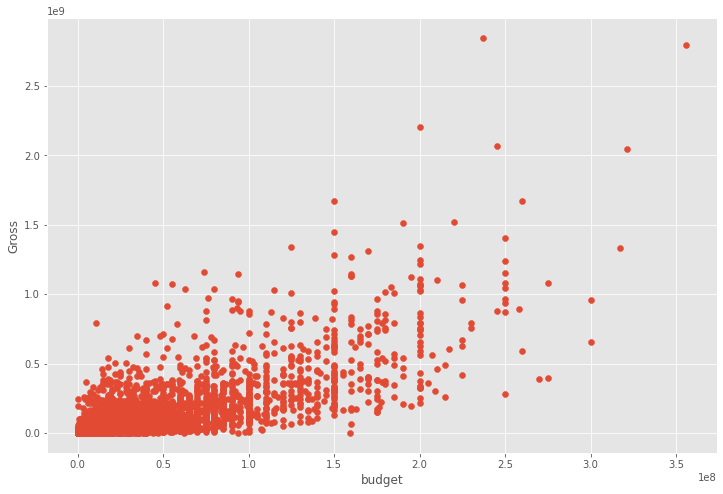

In [62]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.xlabel('budget')
plt.ylabel('Gross')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

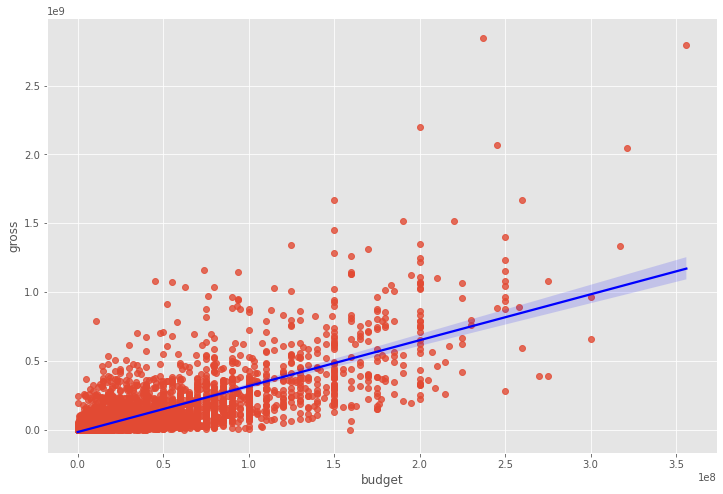

In [71]:
import seaborn as sns 
sns.regplot(x="budget",y="gross",data=df,line_kws={'color':'blue'})



In [73]:
df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


<AxesSubplot:>

Text(0.5, 51.0, 'budget')

Text(87.0, 0.5, 'gross')

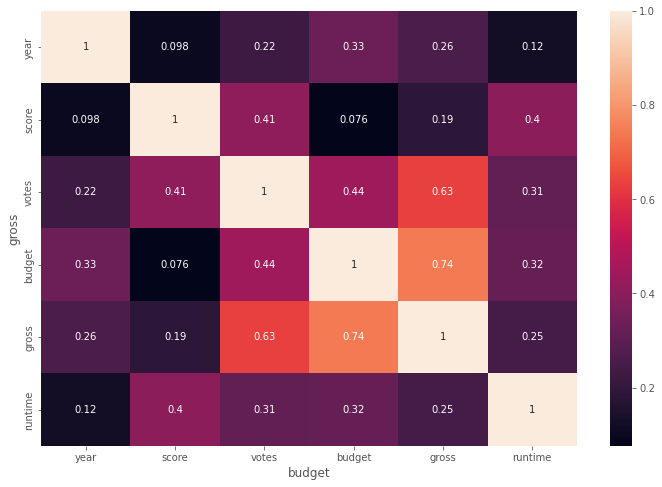

In [77]:
corr_materix=df.corr(method='pearson')
sns.heatmap(corr_materix,annot=True)
plt.xlabel('budget')
plt.ylabel('gross')
plt.show()

In [88]:
#look at company 
df_numarized=df
for col in df_numarized.columns:
    if (df_numarized[col].dtype=="object"):
           df_numarized[col]= df_numarized[col].astype('category')
           df_numarized[col]=df_numarized[col].cats.codes
df_numarized


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,start last name
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,Nicho
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,e Shi
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Hamil
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,t Hay
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Chas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,on Bo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,el Sa
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,a Lau
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,tina


In [89]:
df_numarized.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


<AxesSubplot:>

Text(0.5, 51.0, 'movie features')

Text(87.0, 0.5, 'movie features')

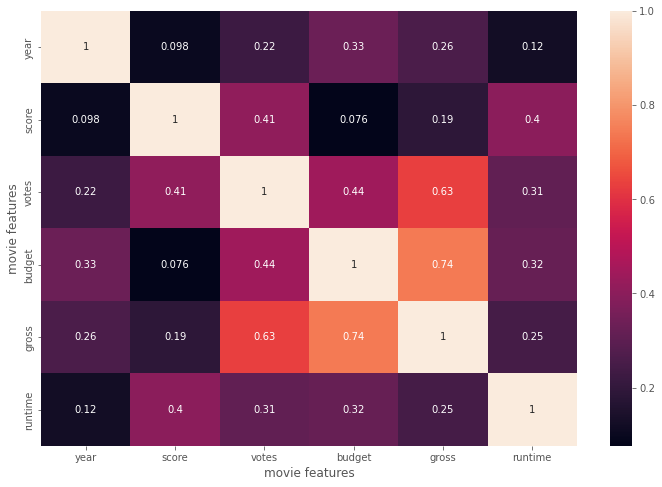

In [90]:
correlation_matrix=df_numarized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

In [103]:
corr_mat=df.corr()
corr_pairs=corr_mat.unstack()
corr_pairs

year     year       1.000000
         score      0.097995
         votes      0.222945
         budget     0.329321
         gross      0.257486
         runtime    0.120811
score    year       0.097995
         score      1.000000
         votes      0.409182
         budget     0.076254
         gross      0.186258
         runtime    0.399451
votes    year       0.222945
         score      0.409182
         votes      1.000000
         budget     0.442429
         gross      0.630757
         runtime    0.309212
budget   year       0.329321
         score      0.076254
         votes      0.442429
         budget     1.000000
         gross      0.740395
         runtime    0.320447
gross    year       0.257486
         score      0.186258
         votes      0.630757
         budget     0.740395
         gross      1.000000
         runtime    0.245216
runtime  year       0.120811
         score      0.399451
         votes      0.309212
         budget     0.320447
         gross

In [106]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs



budget   score      0.076254
score    budget     0.076254
year     score      0.097995
score    year       0.097995
year     runtime    0.120811
runtime  year       0.120811
gross    score      0.186258
score    gross      0.186258
year     votes      0.222945
votes    year       0.222945
gross    runtime    0.245216
runtime  gross      0.245216
year     gross      0.257486
gross    year       0.257486
votes    runtime    0.309212
runtime  votes      0.309212
budget   runtime    0.320447
runtime  budget     0.320447
budget   year       0.329321
year     budget     0.329321
score    runtime    0.399451
runtime  score      0.399451
score    votes      0.409182
votes    score      0.409182
         budget     0.442429
budget   votes      0.442429
votes    gross      0.630757
gross    votes      0.630757
budget   gross      0.740395
gross    budget     0.740395
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross

In [105]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

budget   score      0.076254
score    budget     0.076254
year     score      0.097995
score    year       0.097995
year     runtime    0.120811
runtime  year       0.120811
gross    score      0.186258
score    gross      0.186258
year     votes      0.222945
votes    year       0.222945
gross    runtime    0.245216
runtime  gross      0.245216
year     gross      0.257486
gross    year       0.257486
votes    runtime    0.309212
runtime  votes      0.309212
budget   runtime    0.320447
runtime  budget     0.320447
budget   year       0.329321
year     budget     0.329321
score    runtime    0.399451
runtime  score      0.399451
score    votes      0.409182
votes    score      0.409182
         budget     0.442429
budget   votes      0.442429
votes    gross      0.630757
gross    votes      0.630757
budget   gross      0.740395
gross    budget     0.740395
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross